## Principal Component Analysis

In this part,you will use principal component analysis to perform dimensionality redection 

### 1.1 Example Dataset

In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
data=loadmat("ex7data1.mat")
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

In [3]:
dataSet=pd.DataFrame(data.get('X'),columns=['X1','X2'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


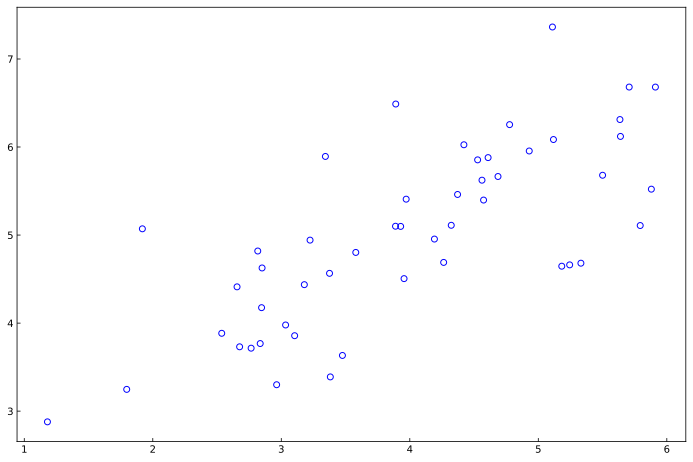

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

plt.figure(figsize=(12,8))
plt.tick_params(direction='in')
plt.scatter(dataSet['X1'],dataSet['X2'],color='',edgecolors='blue')

### 1.2 Implementing PCA

$PCA\space$consists of two computational steps:
    
    1.you compute the covariance matrix of the data
    
    2.you use SVD function to compute the eigenvectors

Covariance matrix of the data:

$\sum=\frac{1}{m}X^{T}X$

In [5]:
#Before using PCA,it is important to normalize the data by subtracting the mean values of each feature from the dataset
#and scaling each dimension.

def PCA(X):
    #normalize the features
    X=(X-X.mean())/X.std()
    
    #compute the covariance matrix
    X=np.mat(X)
    cov=(X.T*X)/X.shape[0]
    
    #perform SVD
    U,S,V=np.linalg.svd(cov)
    
    return U,S,V

In [6]:
X=data.get('X')
U,S,V=PCA(X)

U,S,V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

### 2.3 Dimensionality Reduction with PCA

After computing the principal components,you can use them to reduce the feature dimension of you dataset by projecting each example onto a lower dimensional space.$x^{(i)}->z^{(i)}$

#### 2.3.1 Projecting the data onto the principal components

Specifically,you are given a dataset X,the principal components U,and the desired number of dimensions to reduce to K.

You should project each example in X onto the top K components in U.

In [7]:
def project_data(X,U,K):
    U_reduced=U[:,:K]
    return np.dot(X,U_reduced)

In [8]:
Z=project_data(X,U,1)
Z

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

#### 2.3.2 Reconstructing an approximation of the data

After project the data onto the lower dimensional space,you can approximately recover the data by projecting them back onto high dimensional space. 

In [9]:
def recover_data(Z,U,K):
    U_reduced=U[:,:K]
    return np.dot(Z,U_reduced.T)

In [10]:
X_recoverd=recover_data(Z,U,1)

X_recoverd

matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637],
        [3.53223661, 2.71900952],
        [3.80569251, 2.92950765],
        [5.57926356, 4.29474931],
        [3.93851354, 3.03174929],
        [6.94105849, 5.3430181 ],
        [4.93142811, 3.79606507],
        [5.58255993, 4.29728676],
        [5.48117436, 4.21924319],
        [5.38482148, 4.14507365],
        [5.02696267, 3.8696047 ],
        [5.54606249, 4.26919213],
        [3.60199795, 2.77270971],
        [6.58954104, 5.07243054],
        [5.681006  , 4.37306758],
        [4.02614513, 3.09920545],
        [6.76785875, 5.20969415],
        [5.50019161, 4.2338821 ],
        [6.81311151, 5.24452836],
        [4.56923815, 3.51726213],
        [6.49947125, 5.00309752],
        [4.94381398, 3.80559934],
        [3.47034372, 2.67136624],
        [4.41334883, 3.39726321],
        [5.97375815, 4.59841938],
        [6.10672889, 4.70077626],
        [4.09805306, 3.15455801],
        [4.907

#### 2.3.3 Visualizing the projections

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


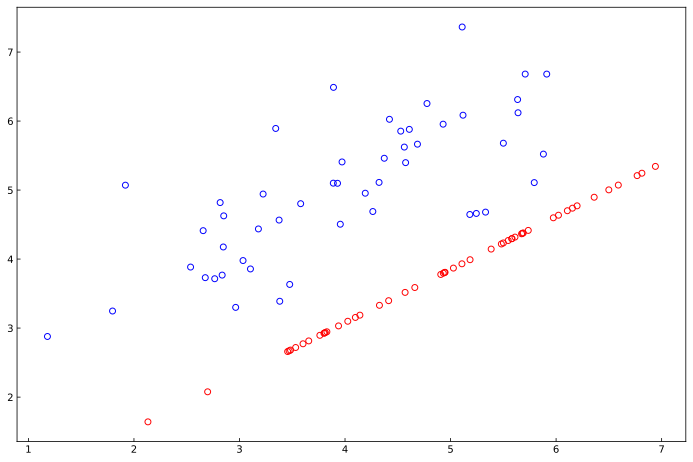

In [11]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

plt.figure(figsize=(12,8))
plt.tick_params(direction='in')
plt.scatter(dataSet['X1'],dataSet['X2'],color='',edgecolors='blue')
plt.scatter(list(X_recoverd[:,0]),list(X_recoverd[:,1]),c='',edgecolors='r')
plt.show()

### 2.4 Face Image Dataset

In this part,you will run PCA on face images to see how it can be used in practice for dimension reduction.

$X$ of face images:each 32x32 in grayscale 

In [12]:
faces=loadmat('ex7faces.mat')
X=faces['X']
X.shape

(5000, 1024)

In [13]:
def plot_n_image(X,n):
    pic_size=int(np.sqrt(X.shape[1]))
    grid_size=int(np.sqrt(n))
    
    first_n_images=X[:n,:]
    
    fig,ax=plt.subplots(nrows=grid_size,ncols=grid_size,sharey=True,sharex=True,figsize=(12,8))
    
    for r in range(grid_size):
        for c in range(grid_size):
            ax[r,c].imshow(first_n_images[grid_size*r+c].reshape((pic_size,pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))            

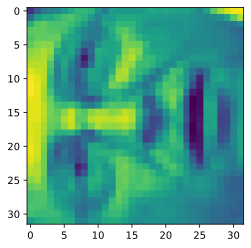

In [14]:
face=np.reshape(X[3,:],(32,32))
plt.imshow(face)

In [15]:
U,S,V=PCA(X)
Z=project_data(X,U,100)

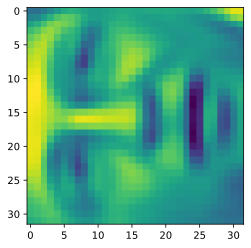

In [16]:
X_recoverd=recover_data(Z,U,100)
face=np.reshape(X_recoverd[3,:],(32,32))
plt.imshow(face)